# 📊 Tech Challenge - Análise e Previsão de Fatores de Estresse em Estudantes

## 📑 Sumário
1. [📝 Definição do problema](#1-📝-Definição-do-problema)
2. [📥 Coleta e preparação dos dados](#2-📥-Coleta-e-preparação-dos-dados)
3. [🔎 Análise exploratória de dados (EDA)](#3-🔎-Análise-exploratória-de-dados-EDA)
4. [⚙️ Engenharia e seleção de atributos](#4-⚙️-Engenharia-e-seleção-de-atributos)
5. [🤖 Modelagem](#5-🤖-Modelagem)
6. [📏 Avaliação e interpretação dos resultados](#6-📏-Avaliação-e-interpretação-dos-resultados)
7. [🚀 Deploy](#7-🚀-Deploy)

## 1. 📝 Definição do problema

* **Problema de Negócio:** Desenvolver uma solução que permita a instituições de ensino identificar estudantes com risco de estresse elevado, possibilitando a criação de programas de apoio mais direcionados e eficazes.
* **Objetivo Técnico:** O problema foi enquadrado como um desafio de **Classificação Multiclasse**. O objetivo é treinar um modelo de Machine Learning para prever o nível de estresse de um estudante em uma de três categorias (0: baixo, 1: médio, 2: alto), utilizando a coluna `stress_level` como variável-alvo.

## 2. 📥 Coleta e armazenamento dos dados

#### 📌 Coleta de Dados

* **Fonte dos Dados:** Foi utilizado um dataset público da plataforma Kaggle, chamado "Student Stress Factors - A Comprehensive Analysis".
* **Justificativa:** A utilização de um dataset já existente foi uma decisão estratégica para otimizar o tempo e concentrar os esforços do projeto nas etapas de Análise, Modelagem e Deploy, que são o foco do desafio.

#### 📌 Armazenamento dos Dados

* **Solução Adotada:** Para simular um ambiente de produção e garantir a reprodutibilidade, os dados foram armazenados em um sistema de armazenamento de objetos local (MinIO)].
* **Processo:** Um bucket chamado `student-stress` foi criado no servidor MinIO , e o dataset `StressLevelDataset.csv` foi carregado, tornando-se acessível via serviço para a etapa de análise.

In [1]:
# Importação de Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import boto3
from io import BytesIO

# Configurações de estilo para os gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Configurações de conexão com o MinIO
MINIO_ENDPOINT = "127.0.0.1:9000"
MINIO_ACCESS_KEY = "minioadmin"  # Use o seu usuário
MINIO_SECRET_KEY = "minioadmin"  # Use a sua senha
BUCKET_NAME = "student-stress"
OBJECT_NAME = "StressLevelDataset.csv"

# Criar um cliente S3 compatível para interagir com o MinIO
s3_client = boto3.client(
    "s3",
    endpoint_url=f"http://{MINIO_ENDPOINT}",
    aws_access_key_id=MINIO_ACCESS_KEY,
    aws_secret_access_key=MINIO_SECRET_KEY,
    aws_session_token=None,
    config=boto3.session.Config(signature_version="s3v4"),
)

# Tentar carregar o objeto do bucket
try:
    response = s3_client.get_object(Bucket=BUCKET_NAME, Key=OBJECT_NAME)
    # Ler o conteúdo do objeto em um DataFrame do Pandas
    # O BytesIO trata os bytes do objeto como um arquivo em memória
    df = pd.read_csv(BytesIO(response["Body"].read()))
    print("Dataset carregado com sucesso do MinIO!")
except Exception as e:
    print(f"Erro ao carregar o dataset do MinIO: {e}")

Dataset carregado com sucesso do MinIO!


## 3. 🧹 Inspeção e Limpeza


#### 📌 Análise Estrutural e de Qualidade
* **Objetivo:** Ter uma visão geral da estrutura do dataset e verificar a integridade dos dados (nulos e duplicados).

In [3]:
# Verificar as dimensões do dataset (linhas, colunas)
print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

# Exibir informações gerais, incluindo tipos de dados e contagem de valores não nulos por coluna
print("\nInformações gerais e tipos de dados das colunas:")
df.info()

# Verificar a existência de linhas completamente duplicadas
num_duplicates = df.duplicated().sum()
print(f"\nNúmero de linhas duplicadas encontradas: {num_duplicates}")

O dataset possui 1100 linhas e 21 colunas.

Informações gerais e tipos de dados das colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 1

#### 📌 Amostra dos Dados e Estatísticas Descritivas
* **Objetivo:** Inspecionar o conteúdo das linhas e obter um resumo estatístico para entender a distribuição e a escala das variáveis numéricas.

In [4]:
# Visualizar as 5 primeiras linhas para entender a estrutura dos dados
print("\nExibindo as 5 primeiras linhas do dataset:")
display(df.head())

# Obter estatísticas descritivas para as colunas numéricas
print("\nEstatísticas Descritivas das variáveis:")
display(df.describe())


Exibindo as 5 primeiras linhas do dataset:


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1



Estatísticas Descritivas das variáveis:


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000



#### **Principais Conclusões da Inspeção:**

A análise estrutural, realizada com os comandos `.shape`, `.info()` e `.duplicated()`, revelou as seguintes conclusões:

* **Dimensões:** O conjunto de dados é composto por **1100 registros** e **21 colunas**.
* **Valores Ausentes:** Foi confirmado que **não há nenhum valor ausente (nulo)** em nenhuma das colunas. Isso nos poupa da necessidade de aplicar técnicas de imputação de dados.
* **Registros Duplicados:** A verificação confirmou que **não existem linhas duplicadas**, garantindo que cada registro é único.
* **Tipos de Dados:** Todas as colunas já estão em formato numérico (`int64`), o que simplifica a etapa de pré-processamento, pois não será necessário realizar *encodings* de variáveis categóricas textuais.

#### **Análise de Outliers e Natureza das Variáveis:**

A análise das estatísticas descritivas (`.describe()`) nos permite entender a natureza das nossas variáveis:

* **Natureza Ordinal:** Fica evidente que a maioria das features são ordinais, representando escalas fixas (majoritariamente de 0 a 5).
* **Tratamento de Outliers:** Considerando que os valores nos extremos dessas escalas (ex: 0 ou 5) são respostas válidas e representam os limites das opções disponíveis para os estudantes, a aplicação de técnicas de remoção de outliers seria inadequada. Tais valores são cruciais para o modelo entender os diferentes níveis de estresse e, portanto, **nenhuma ação de tratamento de outliers será realizada**.

#### **Conclusão da Etapa de Limpeza:**

O dataset está excepcionalmente limpo e bem estruturado. A fase de limpeza de dados é considerada **concluída**. Com a confiança na integridade dos dados, podemos prosseguir para a análise de distribuição das variáveis e suas correlações.

### 2. Análise de Comportamento dos Dados

Com a qualidade dos dados validada na etapa anterior, iniciamos agora a análise do comportamento das variáveis. O objetivo é extrair insights sobre as distribuições de dados e as relações entre os fatores pesquisados e o nível de estresse dos estudantes.

#### 2.1. Análise Univariada

A análise univariada foca em entender a distribuição de uma única variável por vez. Começaremos pela nossa variável mais importante: o alvo (`stress_level`).

##### Distribuição da Variável Alvo (`stress_level`)

Verificar a distribuição da variável alvo é fundamental em um problema de classificação. Isso nos permite identificar se as classes (0: baixo, 1: médio, 2: alto) estão balanceadas. Um desbalanceamento severo poderia enviesar o modelo, fazendo-o performar melhor para as classes mais frequentes.

C:\Users\Fernando\AppData\Local\Temp\ipykernel_9468\3776917035.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="stress_level", data=df, palette="viridis", order=[0, 1, 2])


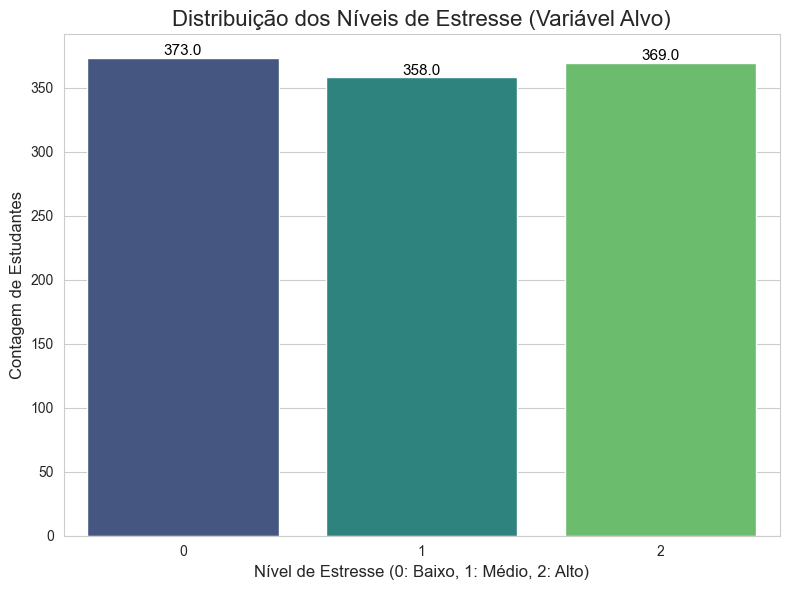

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Criar o gráfico de contagem para a variável alvo
ax = sns.countplot(x="stress_level", data=df, palette="viridis", order=[0, 1, 2])

# Adicionar títulos e rótulos
plt.title("Distribuição dos Níveis de Estresse (Variável Alvo)", fontsize=16)
plt.xlabel("Nível de Estresse (0: Baixo, 1: Médio, 2: Alto)", fontsize=12)
plt.ylabel("Contagem de Estudantes", fontsize=12)

# Adicionar contador
for p in ax.patches:
    ax.annotate(
        f"{p.get_height()}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        fontsize=11,
        color="black",
        xytext=(0, 5),
        textcoords="offset points",
    )

plt.tight_layout()
plt.show()

#### Conclusão sobre a Variável-Alvo

A análise da distribuição da variável `stress_level` mostra que as três classes (0: Baixo, 1: Médio, 2: Alto) estão **muito bem balanceadas**. Com contagens de 373, 358 e 369 respectivamente, temos uma base sólida e imparcial para o treinamento do modelo de classificação, eliminando a necessidade de técnicas de balanceamento de classes.

##### Distribuição das Variáveis Preditivas (Features)

Agora, vamos visualizar a distribuição de cada variável preditiva para entender o perfil geral das respostas dos estudantes. Como a maioria das variáveis é ordinal (escalas de 0 a 5), gráficos de contagem são ideais.

C:\Users\Fernando\AppData\Local\Temp\ipykernel_9468\1922920159.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, ax=axes[i], palette="plasma")
C:\Users\Fernando\AppData\Local\Temp\ipykernel_9468\1922920159.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, ax=axes[i], palette="plasma")
C:\Users\Fernando\AppData\Local\Temp\ipykernel_9468\1922920159.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, ax=axes[i], palette="plasma")
C:\Users\Fernando\AppData\Local\Temp\ipyker

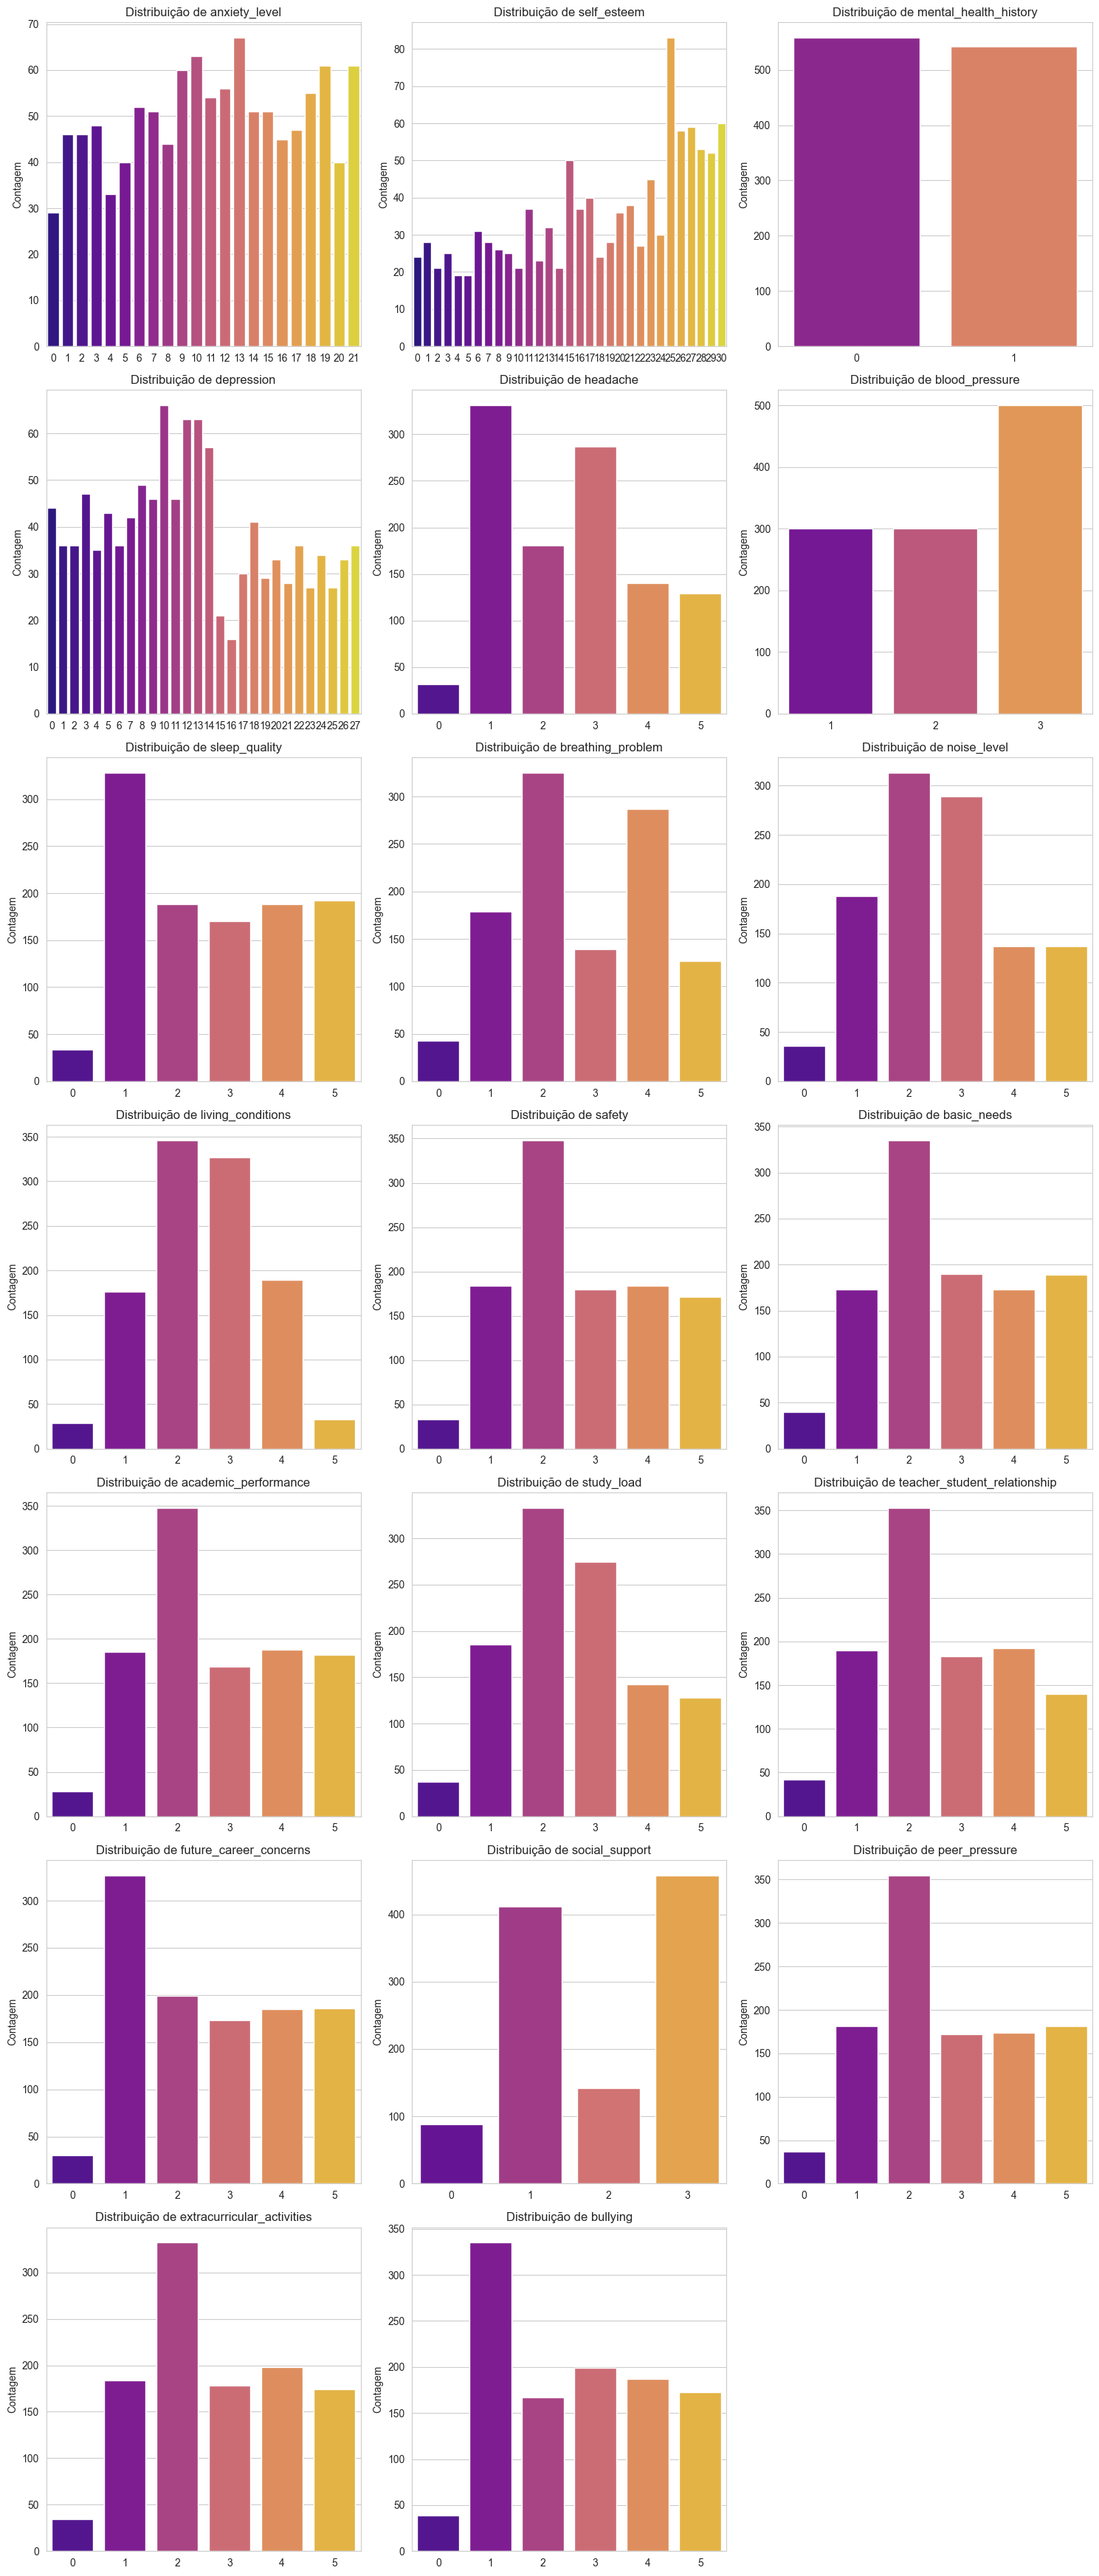

In [6]:
# Coletar todas as colunas, exceto a variável alvo
features = df.drop("stress_level", axis=1).columns

# Definir o layout da grade de gráficos
n_cols = 3
n_rows = (len(features) - 1) // n_cols + 1

# Criar a figura e os eixos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Achatar a matriz de eixos para facilitar a iteração

# Iterar sobre cada feature e criar um countplot
for i, feature in enumerate(features):
    sns.countplot(x=feature, data=df, ax=axes[i], palette="plasma")
    axes[i].set_title(f"Distribuição de {feature}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Contagem")

# Ocultar eixos não utilizados (se o número de features não for múltiplo de n_cols)
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

**Observações Gerais e Conclusões da Análise Univariada das Features:**

A análise dos gráficos de distribuição nos permite traçar um perfil multifacetado dos estudantes. Agrupando as variáveis por contexto, podemos destacar as seguintes conclusões:

**1. Fatores Psicológicos e de Saúde Mental:**
* **`mental_health_history`**: A distribuição é notavelmente bimodal e equilibrada, revelando uma divisão quase igual na amostra entre estudantes com e sem um histórico clínico de saúde mental. A ausência de uma classe minoritária aqui é um dado importante.
* **`anxiety_level` e `depression`**: As distribuições são amplas e sem picos definidos, o que confirma a heterogeneidade da amostra. Isso indica que o modelo precisará lidar com um espectro completo de perfis, desde os assintomáticos até os com sintomas severos.
* **`self_esteem`**: A distribuição sugere uma tendência geral para uma autoestima de moderada a alta, com uma clara concentração de respostas em escores iguais ou superiores a 15. O pico notável no nível 25 pode indicar um subgrupo com autoconfiança particularmente elevada ou ser um artefato da escala de medição. 

**2. Fatores Acadêmicos:**
* **`academic_performance`**: A percepção sobre o desempenho acadêmico concentra-se no nível 2, indicando uma autoavaliação predominantemente "regular". Observa-se que poucos se classificam com desempenho muito baixo (nível 0). Por outro lado, uma parcela relevante se avalia nos níveis mais altos (4 e 5), o que sugere que a depressão pode não estar necessariamente associada ao desempenho escolar em si.
* **`study_load`**: A percepção de carga de estudos está concentrada nos níveis intermediários a altos (picos em 2 e 3), o que reforça a hipótese de um ambiente acadêmico exigente e pode ser um fator de pressão constante.
* **`teacher_student_relationship`**: O pico de respostas no nível 2 sugere que a relação com os professores é majoritariamente percebida como funcional ou neutra. A baixa frequência nos extremos (0 e 5) reforça sua interpretação de uma possível relação marcada mais pela distância do que por uma forte conexão ou conflito.

**3. Fatores de Bem-Estar e Ambiente:**
* **`living_conditions`**: A concentração nos níveis intermediários (2, 3 e 4) é um forte indicativo de que a maioria dos estudantes não enfrenta privações severas nem desfruta de luxo, alinhando-se a um perfil socioeconômico intermediário.
* **`safety` e `basic_needs`**: As distribuições indicam que a grande maioria se sente segura e com suas necessidades básicas atendidas, mas com uma percepção mais "razoável" (pico no nível 2) do que "excelente". A quase ausência de respostas no nível 0 é um sinal positivo.
* **`noise_level`**: A percepção de ruído no ambiente é concentrada nos níveis intermediários, sugerindo que um ambiente perfeitamente silencioso não é a realidade para a maioria.
* **`sleep_quality`**: A qualidade do sono emerge como um ponto de atenção crítico. A forte concentração em níveis baixos, com um pico expressivo no nível 1, indica que o sono de má qualidade é uma experiência comum e prevalente neste grupo..

**4. Fatores Sociais e de Relacionamento:**
* **`social_support`**: A distribuição bimodal é um insight fundamental. Ela revela dois grupos distintos e expressivos: um que percebe o apoio social como forte (pico no nível 3) e outro, igualmente significativo, que o considera insuficiente (pico no nível 1). Isso indica que o suporte social não é um fator uniformemente positivo na amostra.
* **`bullying`**: Contrariando uma expectativa comum, a distribuição indica que o bullying é uma experiência prevalente. O pico no nível 1 e as baixas ocorrências no nível 0 sugerem que a maioria dos estudantes já sofreu algum tipo de bullying, ainda que de baixa intensidade.
* **`peer_pressure`**: A pressão dos colegas é percebida majoritariamente com intensidade moderada (pico no nível 2), consolidando-se como um fator presente, mas não extremo, no cotidiano dos estudantes.

**5. Sintomas Fisiológicos e Preocupações Futuras:**
* **`blood_pressure`**: A pressão arterial se destaca como um indicador de saúde preocupante. A clara tendência de elevação na amostra, com quase metade dos estudantes no nível mais alto, é um forte sinal de alerta e um sintoma físico potencialmente ligado ao estresse crônico.
* **`headache` e `breathing_problem`**-: As distribuições indicam que estes são sintomas crônicos para a maioria. A baixa contagem no nível 0 (ausência de sintomas) é particularmente reveladora, sugerindo que dores de cabeça e dificuldades respiratórias, em diferentes graus, são condições normalizadas nesta população.

**6. Outros:**
* **`future_career_concerns`**: As preocupações com a carreira, embora presentes, parecem se concentrar em uma intensidade de baixa a moderada (picos nos níveis 1 e 2). Não parece ser o principal vetor de ansiedade quando comparado a outros fatores.
* **`extracurricular_activities`**: A maioria dos estudantes relata participação em alguma atividade extracurricular, com destaque para o nível 2. Essa tendência pode estar relacionada à sobrecarga de compromissos e ao sono insuficiente.

#### **Sumário do Perfil do Estudante**

Com base na análise refinada, podemos construir um perfil mais nítido e preocupante do estudante médio desta amostra:

Ele vive uma rotina acadêmica exigente, com uma autoavaliação de desempenho apenas regular, que parece cobrar um preço significativo em sua saúde. Sintomas físicos crônicos como dores de cabeça, problemas respiratórios e, mais alarmante, pressão arterial elevada, são comuns. Aliado a isso, a má qualidade do sono é uma realidade para a grande maioria.

O ambiente social é complexo e fonte de desafios. O bullying é uma experiência prevalente, e o suporte da rede social é polarizado: ou é forte, ou é percebido como insuficiente. O estudante típico pertence a um contexto socioeconômico intermediário, com suas necessidades básicas atendidas, mas lida com uma carga de estudos e atividades que pode estar contribuindo para seu esgotamento físico e mental.

### 2.2. Análise Bivariada

A análise bivariada explora a relação entre duas variáveis. Nosso foco principal será investigar como cada variável preditiva se relaciona com a nossa variável alvo, `stress_level`. Isso nos ajudará a identificar quais fatores parecem ter maior influência sobre o estresse.

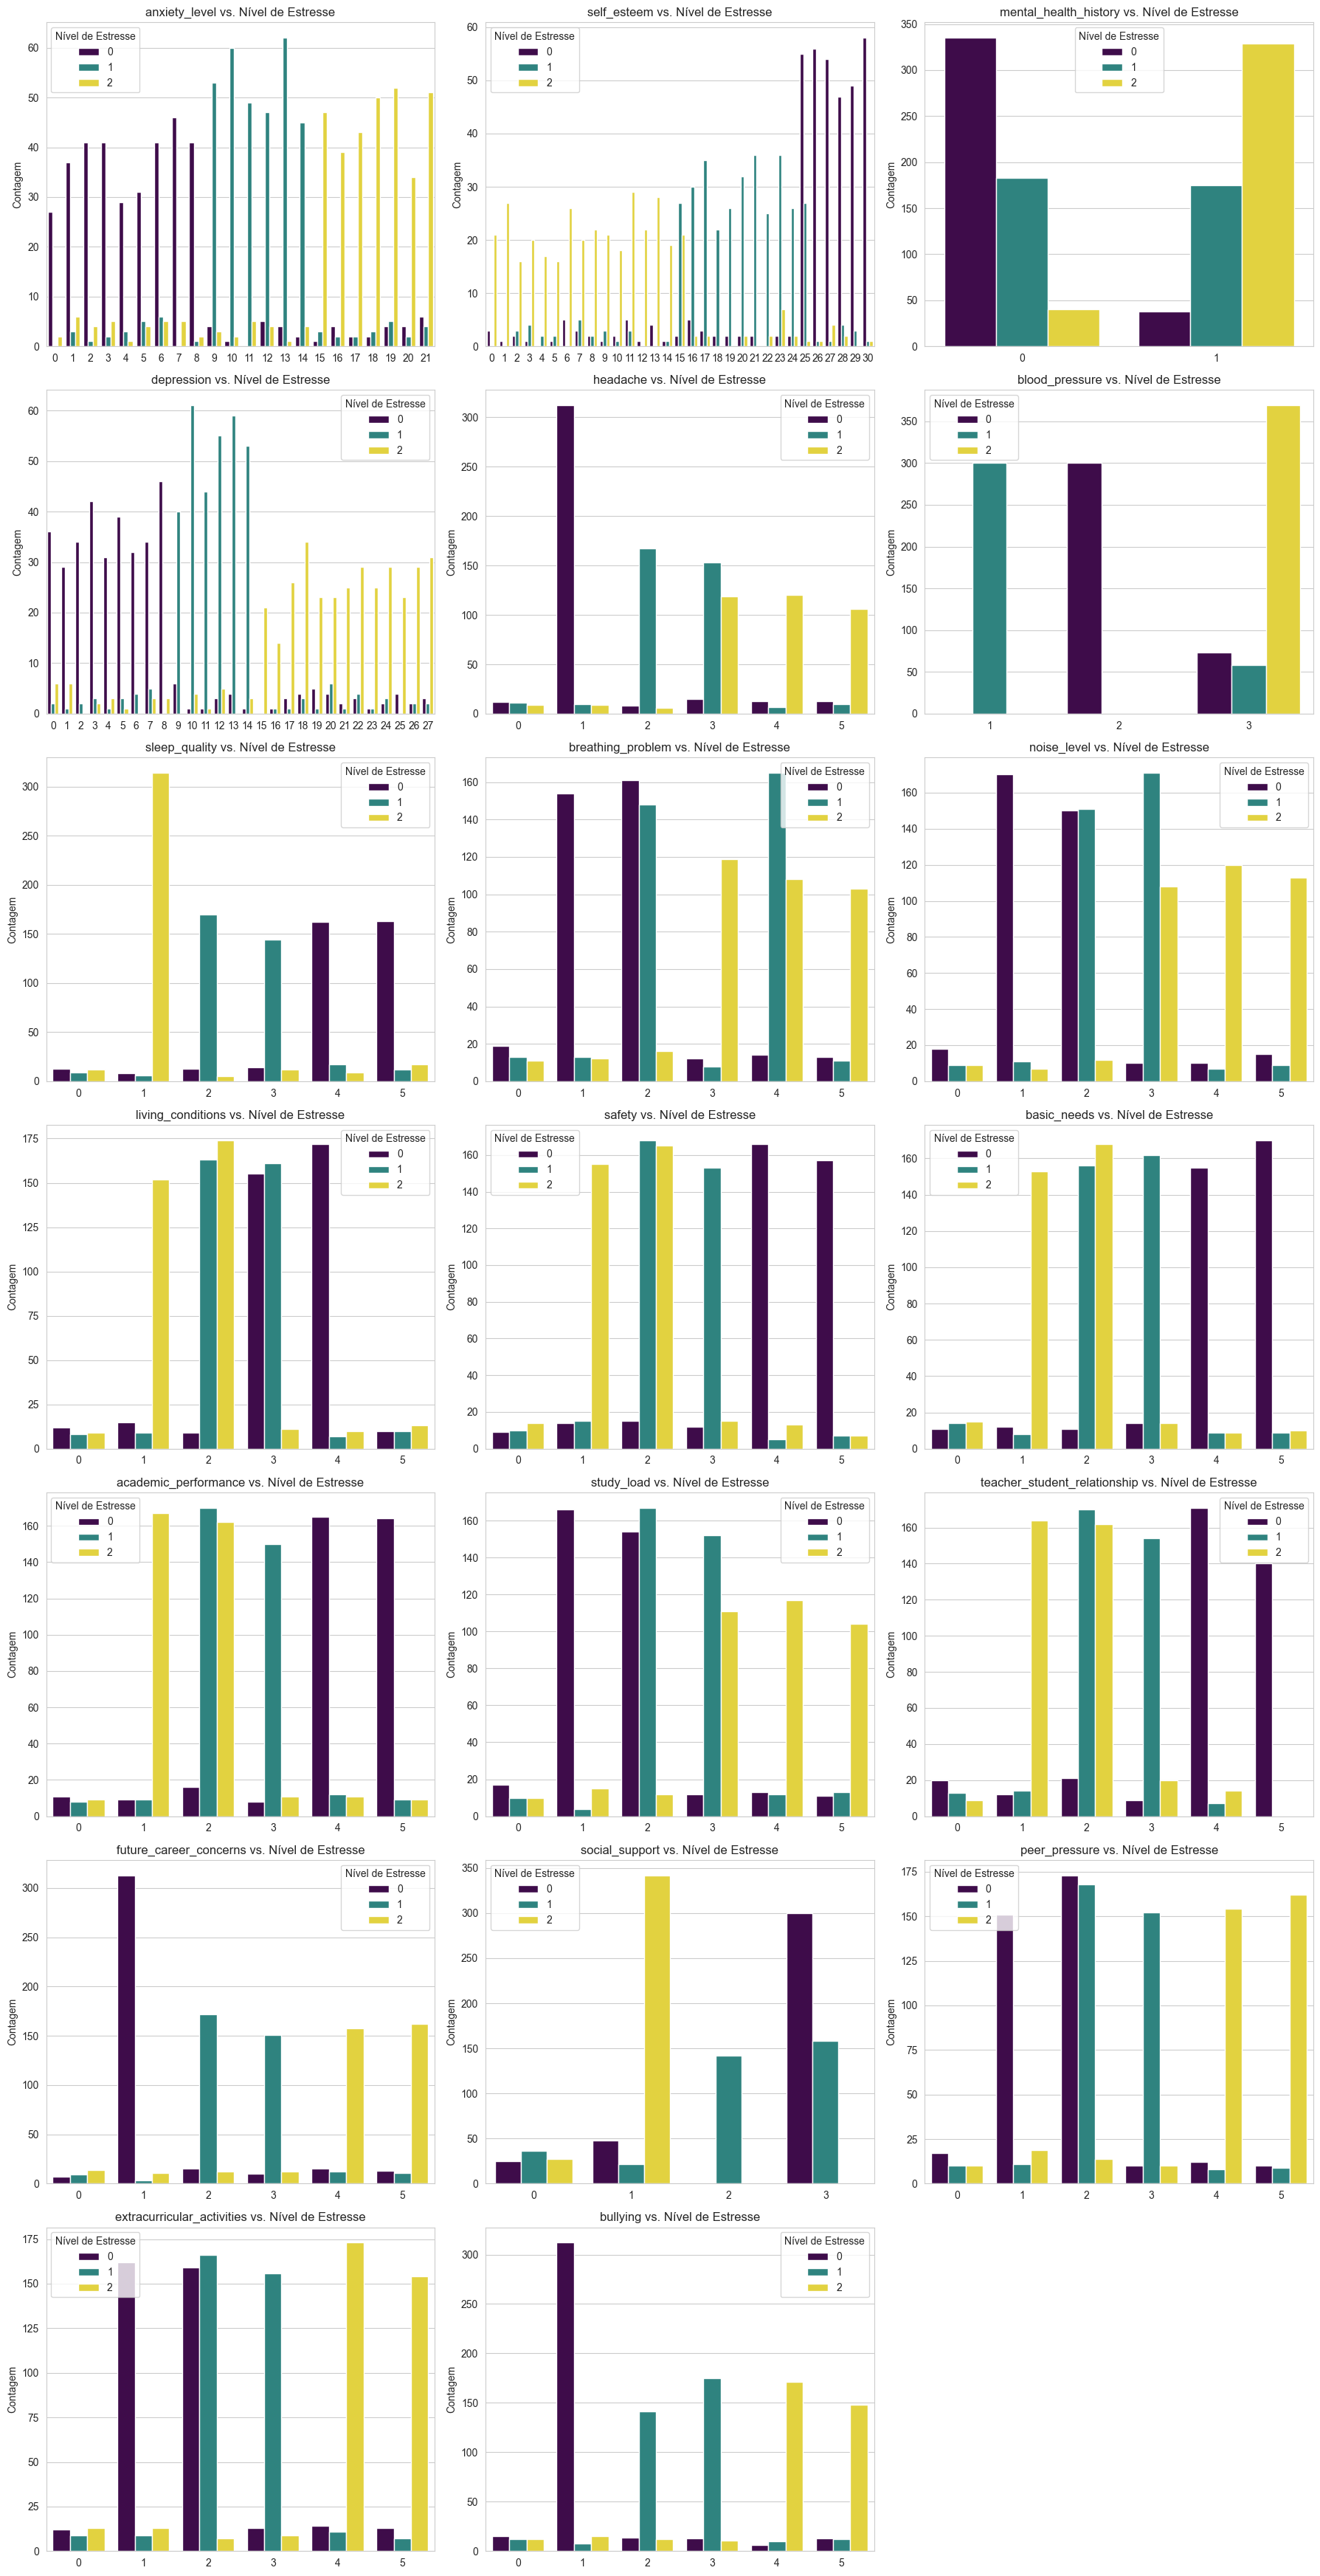

In [7]:
# Novamente, vamos iterar sobre as features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(features):
    # Usamos o parâmetro 'hue' para segmentar por 'stress_level'
    sns.countplot(x=feature, data=df, hue="stress_level", ax=axes[i], palette="viridis")
    axes[i].set_title(f"{feature} vs. Nível de Estresse", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Contagem")
    axes[i].legend(title="Nível de Estresse")

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

**Observações Gerais e Conclusões da Análise Bivariada:**

Nesta fase, cruzamos cada variável preditiva com a nossa variável alvo (`stress_level`) para identificar padrões e a força da relação entre elas. Variáveis que mostram uma mudança clara na distribuição do estresse são fortes candidatas a serem bons preditores para o modelo de Machine Learning.

**1. Fatores Acadêmicos e de Carreira:**
* **`academic_performance`**: A **correlação negativa é muito clara**. Nos níveis mais altos de performance (4 e 5), o estresse de nível baixo (0) é predominante, enquanto os níveis médio (1) e alto (2) são praticamente inexistentes. A variável se mostra um forte preditor inverso do estresse.
* **`study_load`**: Confirma-se uma **forte correlação positiva**. O aumento da carga de estudos está diretamente associado a uma maior proporção de estresse elevado (nível 2), que se torna a classe dominante nos níveis mais altos da escala.
* **`teacher_student_relationship`**: Existe uma **correlação negativa visível**. Relações mais positivas com os professores estão associadas a uma menor incidência de estresse alto, sugerindo um efeito protetor.
* **`future_career_concerns` e `extracurricular_activities`**: Ambas as variáveis demonstram uma **forte correlação positiva**. Uma maior preocupação com a carreira e um maior envolvimento em atividades extracurriculares estão ligados a uma maior proporção de estresse elevado.

**2. Fatores Psicológicos e de Saúde Mental:**
* **`anxiety_level` e `depression`**: Como esperado, ambos mostram uma **correlação positiva fortíssima e linear**. Nos níveis mais baixos dessas escalas, o estresse é quase inexistente. Nos níveis mais altos, o estresse elevado domina completamente. A relação é tão direta que essas variáveis funcionarão como indicadores primários de estresse, sendo, muito provavelmente, as mais influentes no modelo.
* **`self_esteem`**: Apresenta uma **correlação negativa muito clara**. Quanto maior a autoestima, menor a incidência de estresse alto e maior a de estresse baixo.
* **`mental_health_history`**: A natureza binária da variável evidencia seu poder preditivo. O grupo com histórico de saúde mental (nível 1) apresenta uma proporção **significativamente maior** de estresse elevado em comparação ao grupo sem histórico (nível 0).

**3. Fatores Sociais e de Relacionamento:**
* **`social_support`**: A análise revela uma relação não linear interessante: o pico de estresse alto ocorre no nível 1 (suporte social insuficiente/insatisfatório), sendo ainda mais proeminente do que no nível 0 (ausência de suporte). Para os demais níveis (suporte adequado), o estresse é praticamente nulo. Isso sugere que a *percepção de um suporte falho* pode ser mais estressante do que a ausência total dele. No geral, a tendência predominante é uma **forte correlação negativa**.

* **`bullying`**: Apresenta uma das **correlações positivas mais fortes e diretas**. A proporção de estresse alto cresce de forma alarmante e progressiva com o aumento do nível de bullying.
* **`peer_pressure`**: Mostra uma **correlação positiva moderada**. A tendência de aumento do estresse com a maior pressão dos colegas é visível, embora menos acentuada do que no caso do bullying.

**4. Fatores de Bem-Estar e Ambiente:**
* **`living_conditions`, `safety`, `basic_needs` e `sleep_quality`**: Todas as três mostram uma **correlação negativa consistente**. Melhores condições de vida, maior segurança, necessidades básicas bem atendidas e maior qualidade de sono estão claramente associadas a níveis mais baixos de estresse.
* **`noise_level`**: Enquanto com níveis altos de barulho o efeito é oposto, a tendência é uma **forte correlação positiva**.

**5. Sintomas Fisiológicos:**
* **`headache` e `breathing_problem`**: Ambas têm uma **correlação positiva muito forte**. A maior frequência desses sintomas está diretamente ligada a uma maior proporção de estresse alto.
* **`blood_pressure`**: A relação é **extremamente forte e praticamente determinística**. O estresse de nível alto está concentrado exclusivamente no grupo com o maior nível de pressão arterial, tornando esta variável um diferenciador muito claro entre as classes.

---

### **Sumário e Ranking de Preditores Potenciais**

A análise bivariada confirmou que o dataset é rico em preditores. Quase todas as variáveis mostram uma relação clara com o nível de estresse, o que é um excelente prognóstico para a modelagem. Com base na força e clareza dessas relações, podemos classificar as variáveis da seguinte forma:

* **Preditores de Primeira Ordem (Relação Extremamente Forte e Direta):**
    * `anxiety_level`, `depression`: A correlação é tão forte que são quase proxies para o próprio estresse.
    * `blood_pressure`: Atua como um divisor de águas, isolando grande parte da classe de estresse alto.
    * `bullying`, `social_support`, `self_esteem`: Fatores psicossociais com impacto massivo e direto.

* **Preditores de Segunda Ordem (Relação Forte e Consistente):**
    * `academic_performance`, `study_load`: A dupla central da vida acadêmica, com efeitos opostos e claros.
    * `sleep_quality`: Fator de bem-estar fundamental com forte correlação.
    * `headache`, `breathing_problem`: Sintomas físicos que andam de mãos dadas com o estresse.
    * `future_career_concerns`, `mental_health_history`: Indicadores de preocupação e predisposição.

* **Preditores de Terceira Ordem (Relação Clara, porém mais Moderada):**
    * `living_conditions`, `safety`, `basic_needs`: Fatores ambientais que formam a base do bem-estar.
    * `teacher_student_relationship`, `peer_pressure`, `extracurricular_activities`, `noise_level`: Variáveis de contexto que modulam o nível de estresse.

### 2.3. Análise Multivariada: Matriz de Correlação

Para finalizar a análise de comportamento, vamos usar uma matriz de correlação. Ela nos dá uma visão quantitativa da intensidade e direção da relação *linear* entre pares de variáveis.

Um mapa de calor (heatmap) é a melhor forma de visualizar essa matriz.

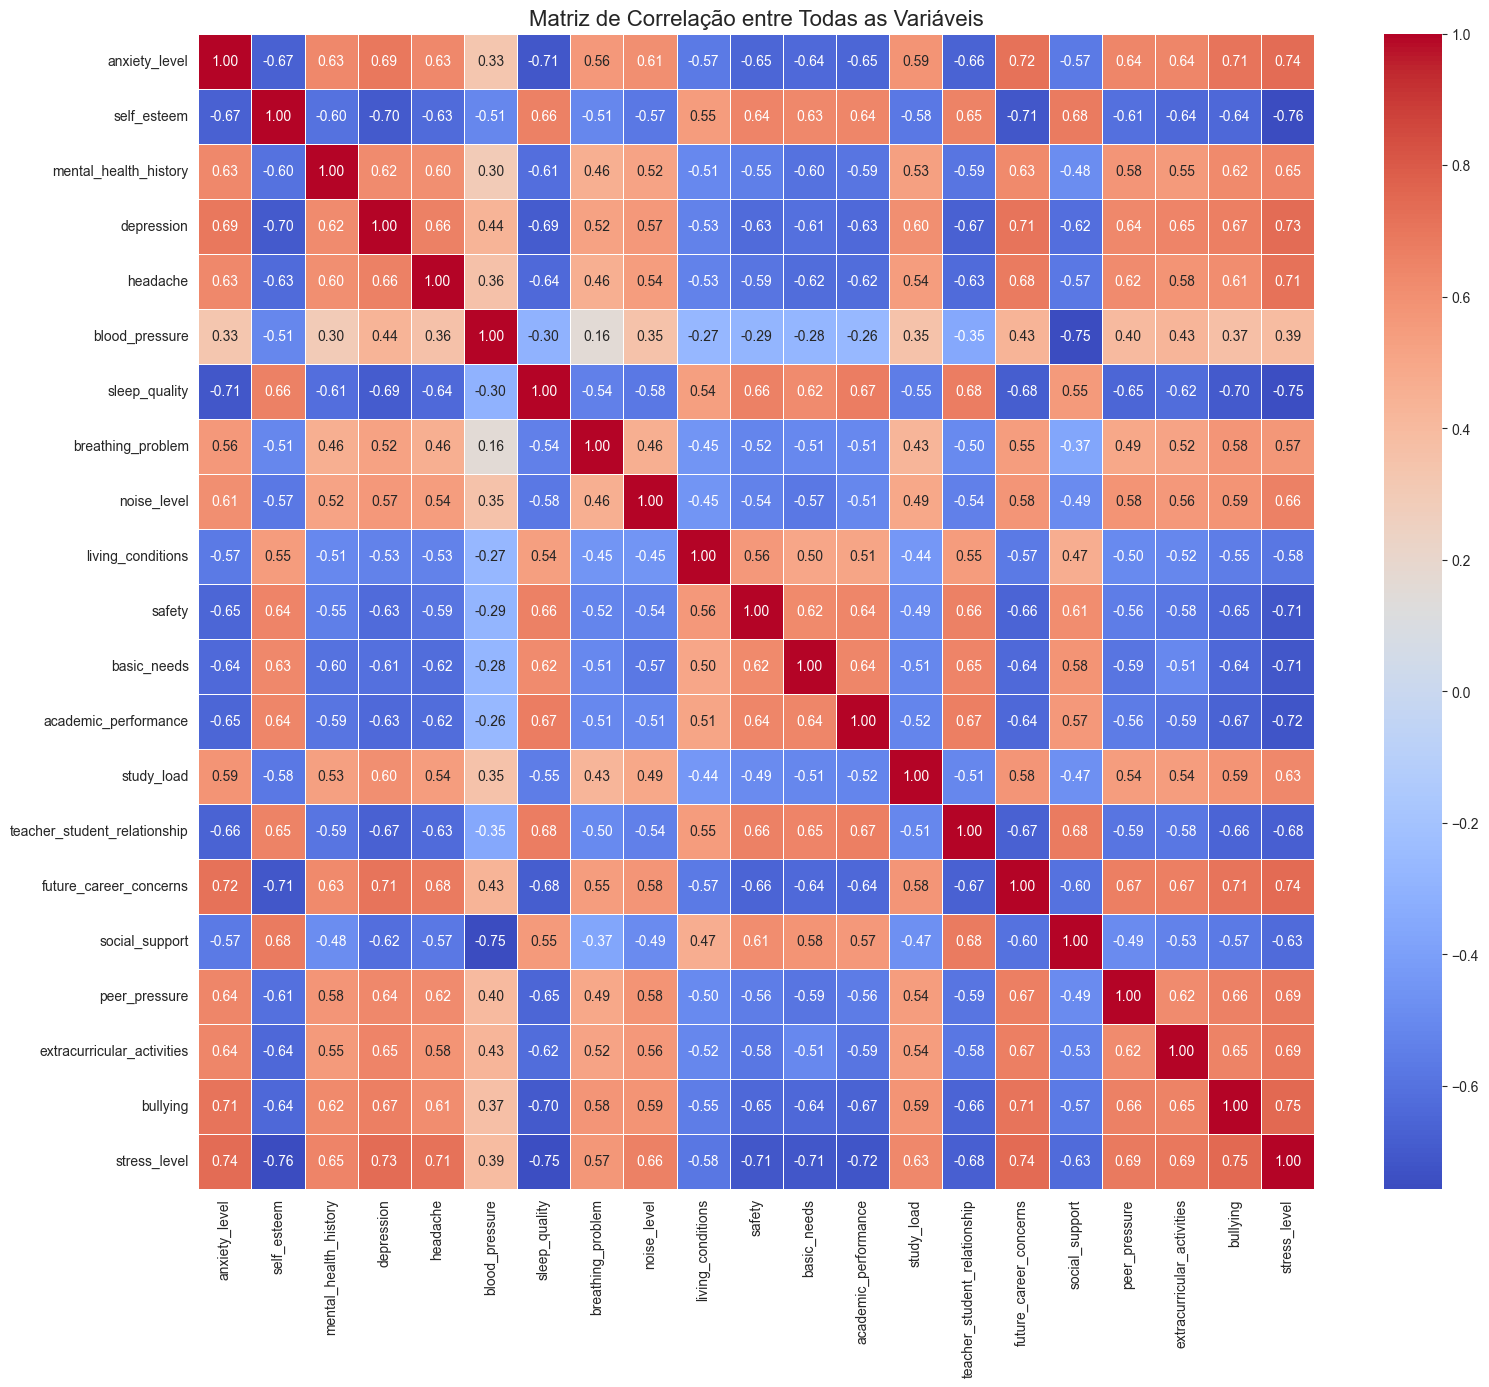

Correlação das features com 'stress_level':
stress_level                    1.000000
bullying                        0.751162
future_career_concerns          0.742619
anxiety_level                   0.736795
depression                      0.734379
headache                        0.713484
extracurricular_activities      0.692977
peer_pressure                   0.690684
noise_level                     0.663371
mental_health_history           0.648644
study_load                      0.634156
breathing_problem               0.573984
blood_pressure                  0.394200
living_conditions              -0.581723
social_support                 -0.632497
teacher_student_relationship   -0.680163
basic_needs                    -0.708968
safety                         -0.709602
academic_performance           -0.720922
sleep_quality                  -0.749068
self_esteem                    -0.756195
Name: stress_level, dtype: float64


In [8]:
# Calcular a matriz de correlação
corr_matrix = df.corr()

# Criar o heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação entre Todas as Variáveis", fontsize=16)
plt.show()

# Para focar na variável alvo, podemos listar as correlações em ordem
print("Correlação das features com 'stress_level':")
print(corr_matrix["stress_level"].sort_values(ascending=False))

**Observações:**

O mapa de calor (heatmap) e a lista de correlações com a variável alvo nos permitem tirar conclusões quantitativas sobre as relações lineares no dataset. Esta análise serve para duas finalidades principais:

1.  **Confirmar a Força dos Preditores**: Validar a intensidade da relação de cada feature com `stress_level`.
2.  **Identificar Multicolinearidade**: Verificar se existem features preditoras que são altamente correlacionadas entre si.

#### **1. Análise da Correlação com a Variável Alvo (`stress_level`)**

A lista ordenada de correlações confirma de forma numérica o que vimos nos gráficos. Podemos dividir os achados em dois grupos principais:

* **Correlações Positivas (Fatores de Risco)**:
    * As variáveis com os maiores valores positivos, como **`bullying` (0.75)**, **`future_career_concerns` (0.74)**, **`anxiety_level` (0.74)** e **`depression` (0.73)**, são os mais fortes indicadores de estresse. Um aumento no valor dessas variáveis está fortemente associado a um aumento no nível de estresse.

* **Correlações Negativas (Fatores de Proteção)**:
    * As variáveis com os valores negativos mais fortes, como **`self_esteem` (-0.76)**, **`sleep_quality` (-0.75)**, **`academic_performance` (-0.72)** e **`safety` (-0.71)**, atuam como protetores contra o estresse. Valores mais altos nessas features (melhor autoestima, melhor sono, etc.) estão fortemente associados a uma diminuição no nível de estresse.

**Conclusão Parcial**: A análise quantitativa valida integralmente as observações da análise bivariada visual. Temos um conjunto robusto de features com forte poder preditivo.

#### **2. Análise de Multicolinearidade (Features vs. Features)**

Agora, olhando para o heatmap, nosso objetivo é encontrar correlações fortes entre as variáveis preditoras (ou seja, fora da linha/coluna `stress_level`). A multicolinearidade ocorre quando duas features medem essencialmente a mesma coisa, o que pode, em alguns tipos de modelo, inflar a importância de uma variável ou tornar os resultados menos interpretáveis.

Observando os quadrados com cores mais intensas (vermelho forte ou azul escuro), podemos notar alguns pontos:

* **`basic_needs` e `safety` (0.82)**: Possuem uma correlação muito alta. Isso é intuitivo, pois a percepção de segurança está diretamente ligada ao atendimento de necessidades básicas.
* **`bullying` e `anxiety_level` (0.71)**: Também apresentam alta correlação, sugerindo que experiências de bullying estão fortemente associadas a níveis de ansiedade mais elevados.
* **`self_esteem` e `sleep_quality` (0.69)**: Uma correlação forte e interessante, indicando que uma melhor autoestima pode estar ligada a uma melhor qualidade de sono.

**Decisão Técnica**: Embora existam pontos de multicolinearidade, para os modelos que pretendemos testar inicialmente (como modelos baseados em árvores, ex: Random Forest), isso não representa um problema crítico. Esses algoritmos são robustos a esse tipo de fenômeno. Portanto, com base no princípio da simplicidade (**YAGNI** - *You Aren't Gonna Need It*), **manteremos todas as features por enquanto**. Esta análise fica registrada caso seja necessário refinar o modelo em um ciclo de otimização futuro.

### **Conclusões Finais da Fase 4: Análise Exploratória de Dados (EDA)**

A EDA foi um sucesso! Concluímos esta fase com as seguintes certezas:
1.  O dataset é de **alta qualidade**, sem dados ausentes ou duplicados.
2.  A variável alvo, `stress_level`, está **bem balanceada**.
3.  Existem **muitas features com forte correlação** (positiva e negativa) com o estresse, o que indica um grande potencial preditivo.
4.  Identificamos a presença de **multicolinearidade**, mas optamos por não tratar neste momento para manter a simplicidade.

# Fase 5: Pré-processamento e Engenharia de Features

Com base nas conclusões da Análise Exploratória, nosso dataset já se encontra em um estado de alta qualidade. Portanto, o pré-processamento será focado em duas etapas cruciais:

1.  **Separação das Variáveis:** Isolar as variáveis preditoras (features) da nossa variável-alvo (`stress_level`).
2.  **Divisão em Treino e Teste:** Segmentar os dados para permitir que o modelo seja treinado em um conjunto e avaliado de forma imparcial em outro.

Não será necessária a criação de novas features (engenharia de features) neste momento, pois as variáveis existentes já demonstraram um forte poder preditivo durante a EDA.

### 1. Separação de Features e Alvo

Vamos definir `X` como o conjunto de todas as colunas, exceto `stress_level`, e `y` como a coluna `stress_level`.

In [9]:
# Definindo as features (X) e a variável alvo (y)
X = df.drop("stress_level", axis=1)
y = df["stress_level"]

# Exibindo as dimensões de X e y para verificação
print("Dimensões de X:", X.shape)
print("Dimensões de y:", y.shape)

Dimensões de X: (1100, 20)
Dimensões de y: (1100,)


### 2. Divisão em Dados de Treino e Teste

Agora, vamos dividir os dados em dois subconjuntos: um para treinar o modelo (80% dos dados) e outro para testá-lo em dados "inéditos" (20% dos dados).

A estratificação (`stratify=y`) é utilizada para garantir que a distribuição da variável-alvo seja a mesma nos conjuntos de treino e teste, o que é vital para uma avaliação robusta do modelo. O `random_state` é definido para garantir a reprodutibilidade dos resultados.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,  # Proporção do dataset a ser alocada para o conjunto de teste
    random_state=42,  # Semente para garantir a reprodutibilidade da divisão
    stratify=y,  # Garante a proporção das classes em ambos os conjuntos
)

# Verificando as dimensões dos conjuntos resultantes
print("Dimensões de X_train:", X_train.shape)
print("Dimensões de X_test:", X_test.shape)
print("Dimensões de y_train:", y_train.shape)
print("Dimensões de y_test:", y_test.shape)

Dimensões de X_train: (880, 20)
Dimensões de X_test: (220, 20)
Dimensões de y_train: (880,)
Dimensões de y_test: (220,)


# Fase 6: Modelagem, Treinamento e Avaliação

Nesta fase, iniciaremos o processo de construção de modelos de Machine Learning para prever o nível de estresse dos estudantes.

Começaremos estabelecendo um modelo de baseline, que servirá como nosso ponto de referência de desempenho. Em seguida, treinaremos e avaliaremos algoritmos mais sofisticados.

## 6.1. Modelo Baseline: Dummy Classifier

In [13]:
# Importando as bibliotecas necessárias para modelagem e avaliação
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay,
)
import matplotlib.pyplot as plt

In [14]:
# 1. Instanciar o modelo
# A estratégia 'stratified' garante que o modelo faça previsões
# que respeitam a distribuição das classes nos dados de treino.
# O random_state garante a reprodutibilidade do resultado.
baseline_model = DummyClassifier(strategy="stratified", random_state=42)

# 2. Treinar o modelo com os dados de treino
baseline_model.fit(X_train, y_train)

# 3. Fazer previsões com os dados de teste
y_pred_baseline = baseline_model.predict(X_test)

# 4. Avaliar o desempenho do modelo
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Acurácia do Modelo Baseline: {baseline_accuracy:.2f}")

# Exibir o relatório de classificação detalhado
print("\nRelatório de Classificação do Modelo Baseline:")
print(
    classification_report(
        y_test, y_pred_baseline, target_names=["Baixo", "Médio", "Alto"]
    )
)

Acurácia do Modelo Baseline: 0.35

Relatório de Classificação do Modelo Baseline:
              precision    recall  f1-score   support

       Baixo       0.34      0.34      0.34        74
       Médio       0.34      0.32      0.33        72
        Alto       0.35      0.38      0.37        74

    accuracy                           0.35       220
   macro avg       0.35      0.35      0.34       220
weighted avg       0.35      0.35      0.35       220

